In [35]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [36]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(133, 100, 1) (132, 100, 1)


In [37]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 0.46725506]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.21054769]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.31312776]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 ...

 [[ 0.70763733]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.19332918]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[ 0.80049815]
  [-1.        ]
  [-1.        ]
  ...
  [-1.        ]
  [-1.        ]
  [-1.        ]]]
New data [[[ 0.5235099 ]
  [-1.0010763 ]
  [-1.0010763 ]
  ...
  [-1.0010763 ]
  [-1.0010763 ]
  [-1.0010763 ]]

 [[ 0.5635175 ]
  [-1.0010763 ]
  [-1.0010763 ]
  ...
  [-1.0010763 ]
  [-1.0010763 ]
  [-1.0010763 ]]

 [[ 0.5983539 ]
  [-1.0010763 ]
  [-1.0010763 ]
  ...
  [-1.0010763 ]
  [-1.0010763 ]
  [-1.0010763 ]]

 ...

 [[ 0.6616428 ]
  [-1.0010763

In [38]:
visualization(ori_data, new_data, 'pca')

IndexError: index 132 is out of bounds for axis 0 with size 132

In [20]:
visualization(ori_data, new_data, 'tsne')

IndexError: index 132 is out of bounds for axis 0 with size 132

In [21]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

visualization(ori_data, new_data, 'pca')
visualization(ori_data, new_data, 'tsne')

(133, 100, 1) (132, 100, 1)


IndexError: index 132 is out of bounds for axis 0 with size 132

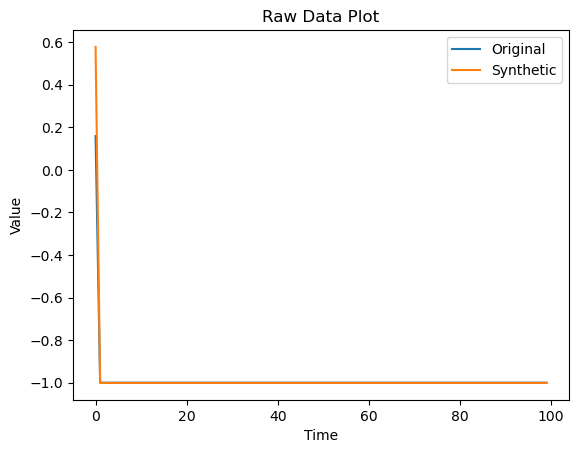

In [22]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

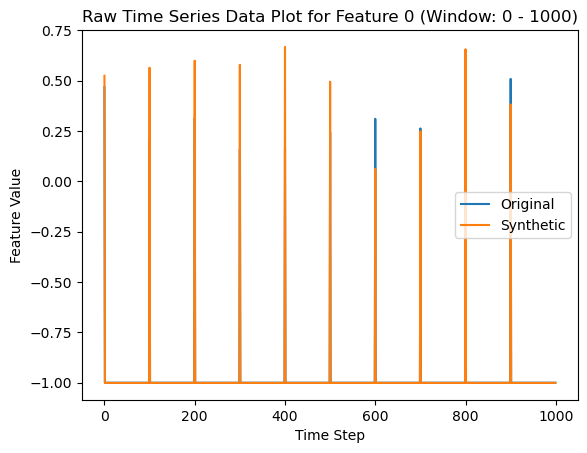

In [23]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 1000  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


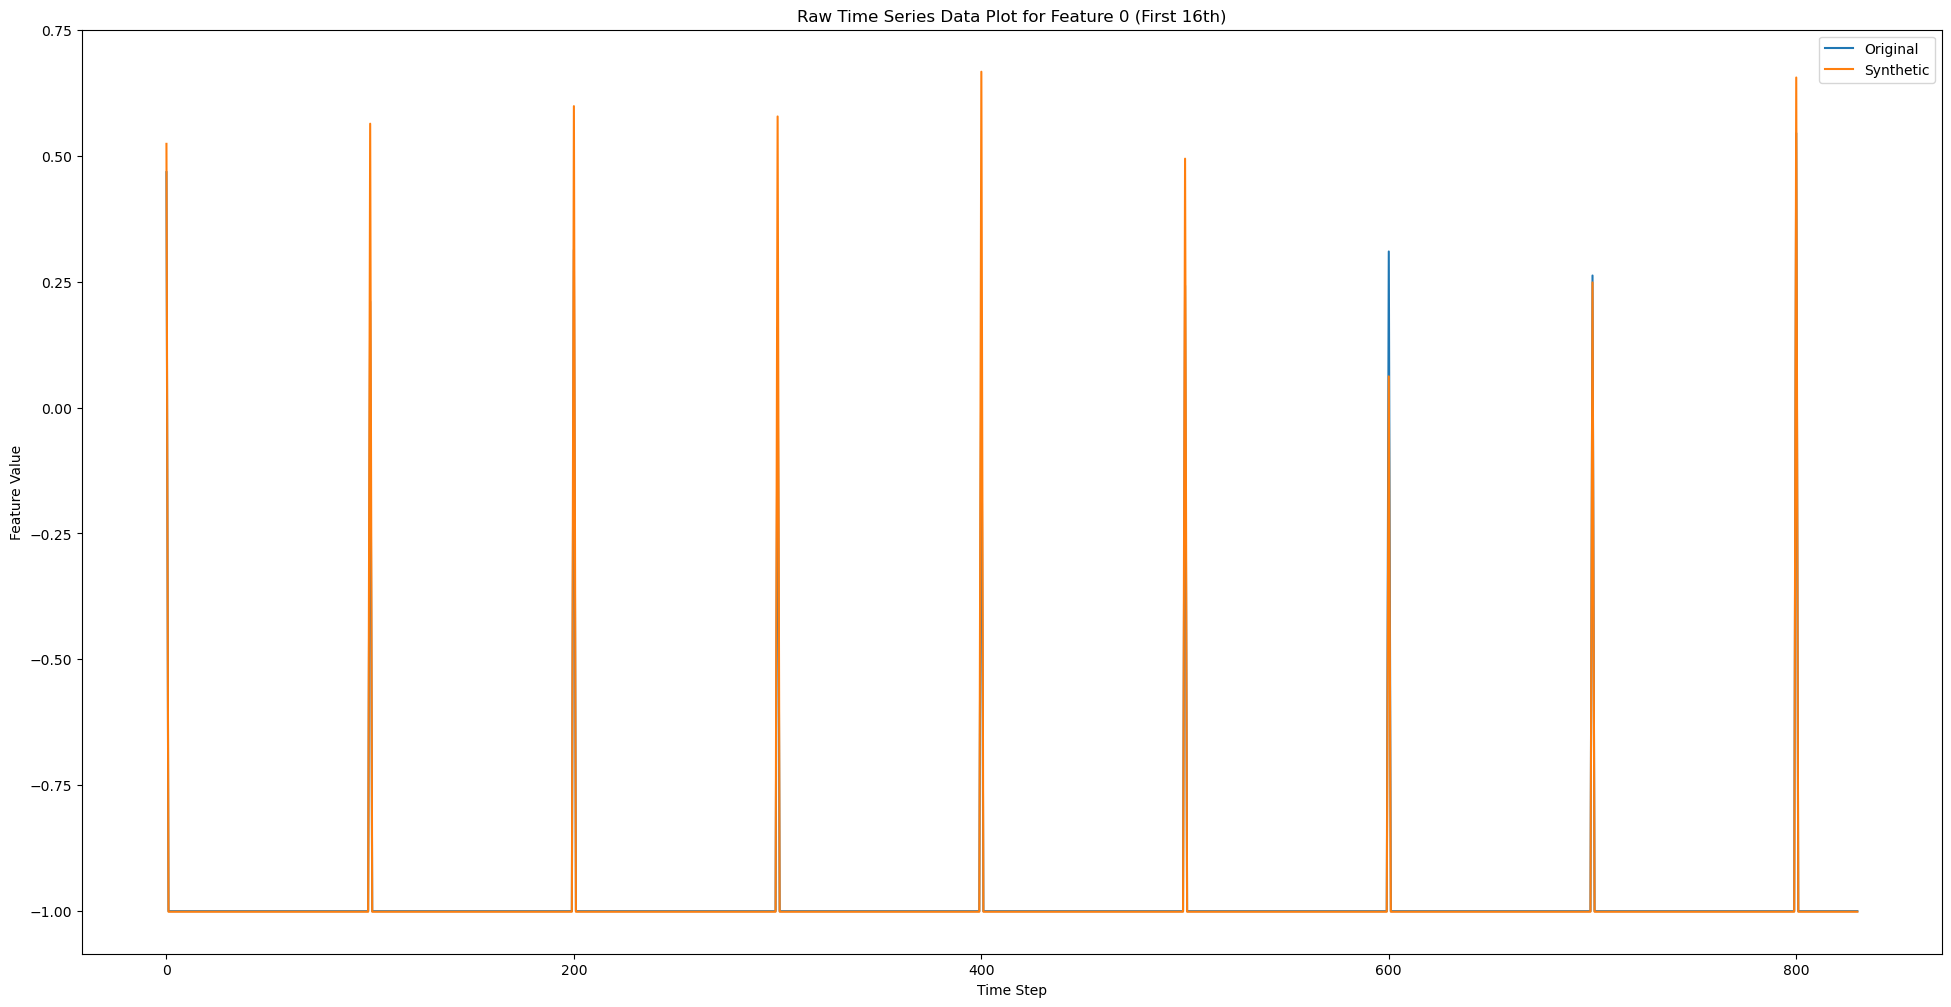

In [24]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()

2001


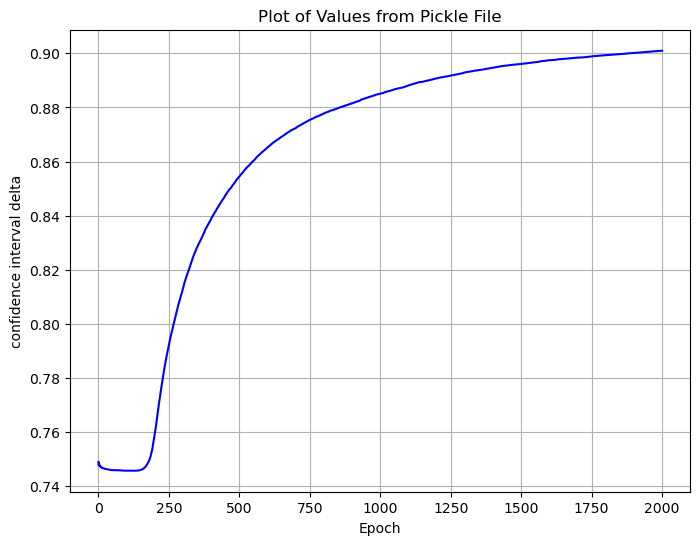

In [26]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/m6_assets/aOrder_5_0_0_confIntrv_ABBV.pickle", 'rb') as f:
    values_list = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

print(len(values_list))

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='b')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('confidence interval delta')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

2001


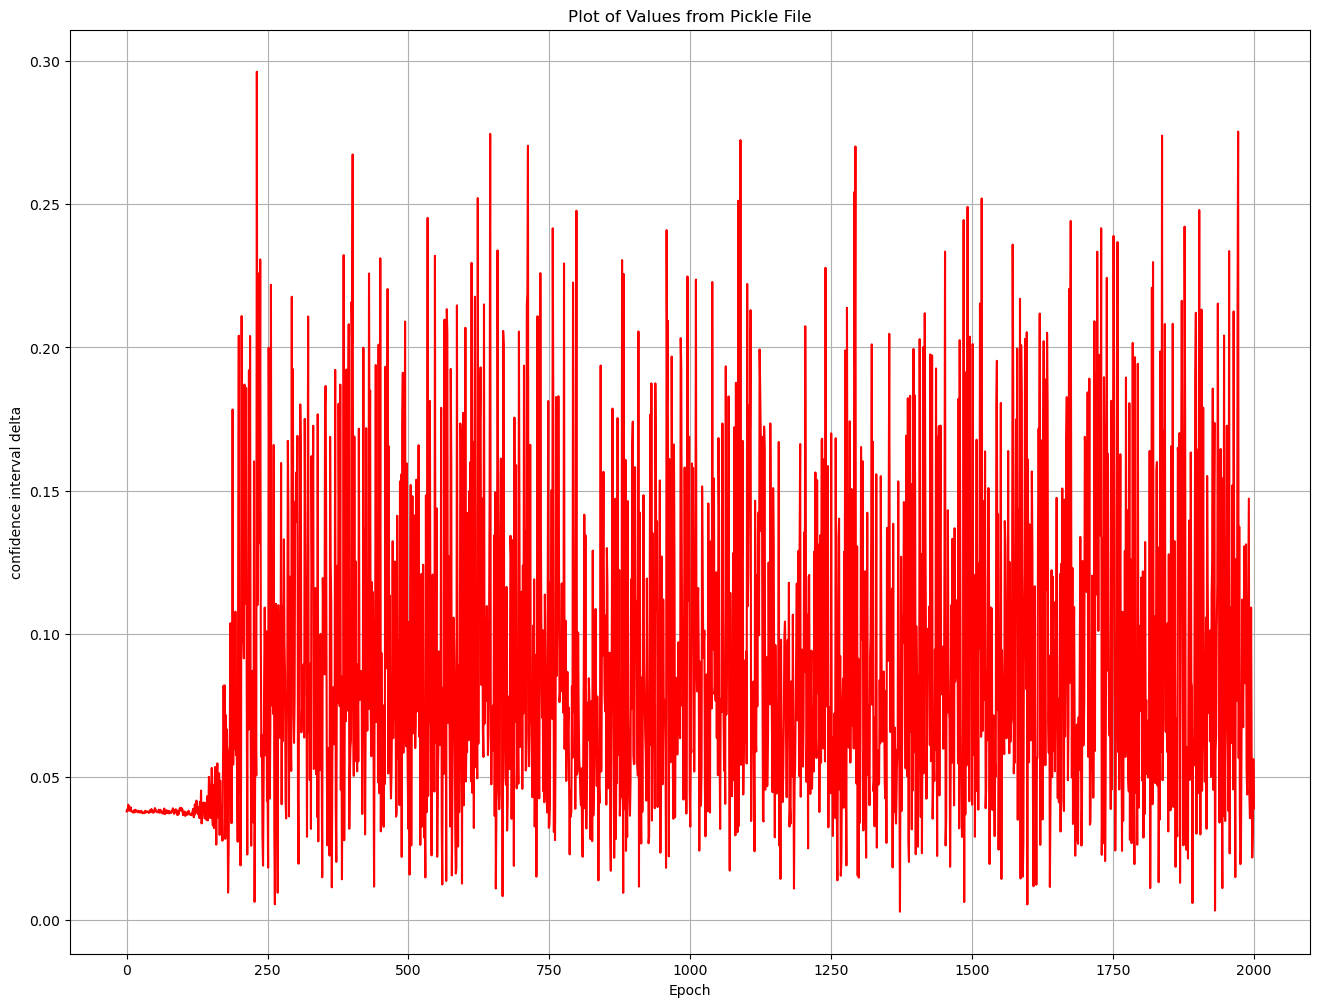

In [27]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/m6_assets/aOrder_5_0_0_avrg_diff_ABBV.pickle", 'rb') as f:
    values_list = pickle.load(f)

print(len(values_list))

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

# Plot the values
plt.figure(figsize=(16, 12))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='r')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('confidence interval delta')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

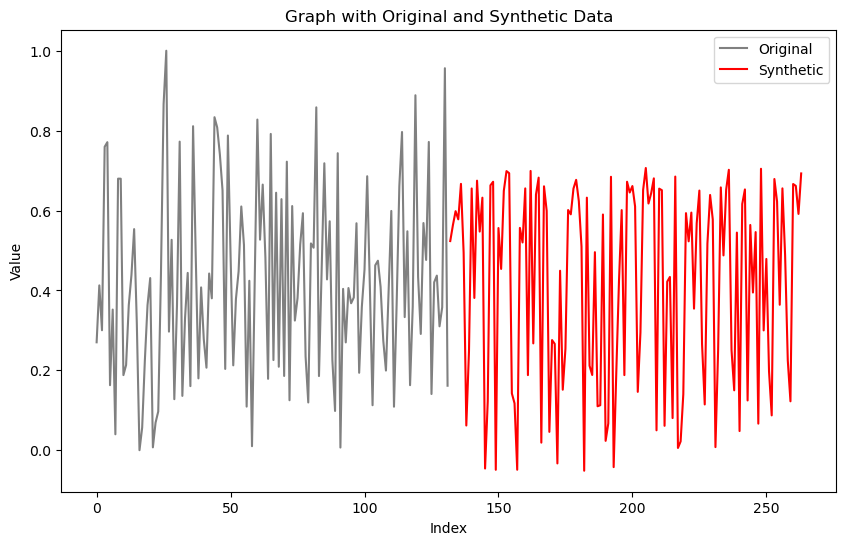

In [28]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='red', label='Synthetic')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph with Original and Synthetic Data')

# Add legend
plt.legend()

# Show plot
plt.show()



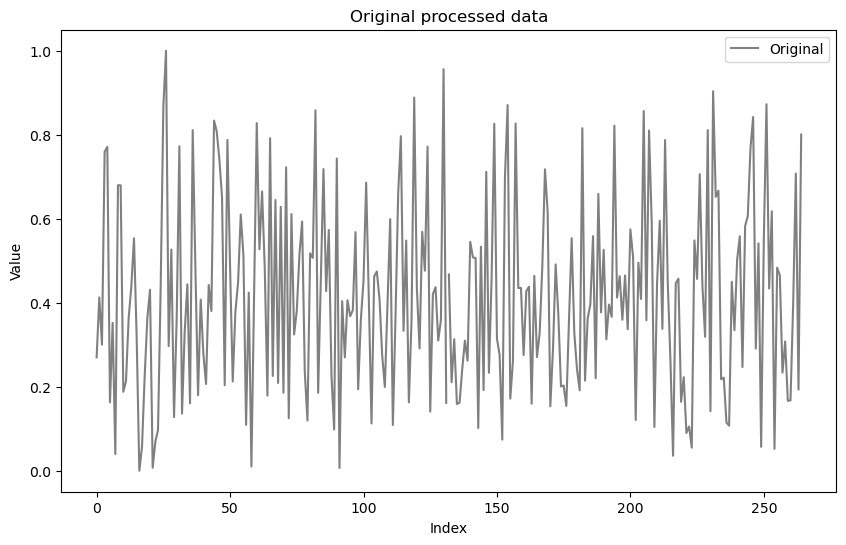

In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='gray')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original processed data')

# Add legend
plt.legend()

# Show plot
plt.show()

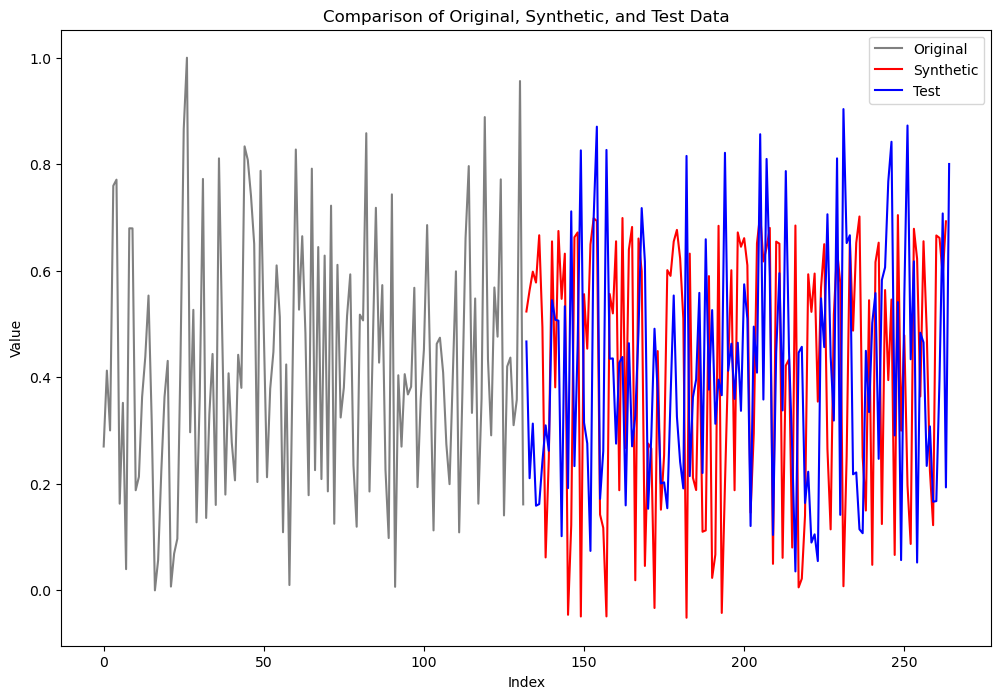

In [30]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for data (train or test)
    data_df = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    data_df_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return data_df, data_df_test

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data(ori_data, fake_data)
_, df_test = prepare_data(ori_data, test_data)

# Plotting both graphs on the same figure
plt.figure(figsize=(12, 8))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_fake['idx'], df_fake['val'], color='red', label='Synthetic')

# Plot test data in blue
plt.plot(df_test['idx'], df_test['val'], color='blue', label='Test')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original, Synthetic, and Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()
